# Gaussian Mixture

## What will we do in this project?

In this project we are going to segment different countries based on socio-economic aspects.

As a model for the segmentation we will use the **Gaussian Mixture**.

A mixture model is a probabilistic model to represent the presence of subpopulations within the overall population, but it does not require that the observed data already identify which subpopulation each individual belongs to.

The Gaussian Mixture is a **probabilistic** method and its advantage is that once clusters have been identified in which to divide the population, **it will tell us the probability of each individual belonging to each subpopulation. The probability will help to evaluate better edge cases.**


In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('Country-data.csv')

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## How to read the data?

In [5]:
from pandas import option_context
data_dict = pd.read_csv('data-dictionary.csv')
with option_context('display.max_colwidth', 400):
    display(data_dict.head(10))

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### Prepare the dataset

In [6]:
# we do not need to include the country name in our model
df = data.iloc[:, 1:]

In [7]:
df.head(1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


### The Akaike information criterion (AIC) and the Bayesian information criterion (BIC)

The first step in creating our model is to decide on an optimal number of clusters.

To do this we will use the Akaike information criterion (AIC) and the Bayesian information criterion (BIC).

The key idea behind these estimators is that whenever we use a statistical model to represent the process that generated the data, this representation is never perfect and there will be some information that will be lost. They estimate the amount of information lost and the less information a model loses the better the model.

In estimating the amount of information lost by a model, AIC and BIC deal with the trade-off between the goodness of fit of the model and the simplicity of the model. We want to find a balance between how well a model represents reality and the simplicity and interpretability of the model.


In [8]:
# Finding optimal number of cluster
n_components = np.arange(1,10)
models = [GaussianMixture(n_components=n, random_state=42).fit(df) for n in n_components]

C:\Users\davide.filosa.ext\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


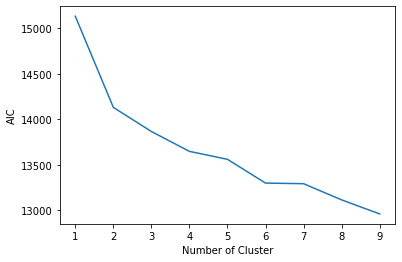

In [9]:
# plot the AIC
AIC = [m.aic(df) for m in models]
plt.plot(n_components, AIC)
plt.xlabel('Number of Cluster')
plt.ylabel('AIC')
plt.show()


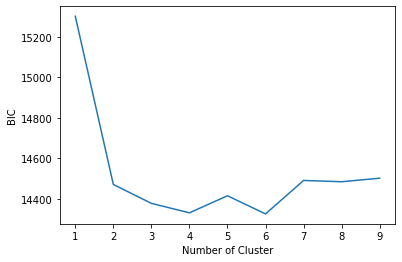

In [10]:
# plot the BIC
BIC = [m.bic(df) for m in models]
plt.plot(n_components, BIC)
plt.xlabel('Number of Cluster')
plt.ylabel('BIC')
plt.show()


The BIC shows that the optimal number of clusters in 2. After 2 the information gain begins to stagnate and we remember that we don't want to make the model more complex if it doesn't improve the goodness of the fit.

however the AIC shows that the optimal number is 7 (which is also the number that allows us to minimize the BIC).

**In a situation like this and in a business setting we can train the model using 2, 4, and 7 clusters and we can decide which performs better also in terms of storytelling.**

For this project we are going to train the model with 4 components.

## Train the model

In [11]:
model = GaussianMixture(n_components=4, random_state=42).fit(df)

# Interpretation

In [12]:
# creting the cluster
cluster = pd.Series(model.predict(df))


In [13]:
# assigning the cluster
data['cluster'] = cluster


In [14]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [16]:
# Searching for a specific country
data.loc[data['country'] == 'Italy']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,2


In [24]:
# creating the probability of belonging to a custler

probabilitis = round(pd.DataFrame(model.predict_proba(df)),2)
probabilitis.head()

,0,1,2,3
0,1.00,0.0,0.0,0.00
1,0.13,0.0,0.0,0.87
2,0.01,0.0,0.0,0.99
3,1.00,0.0,0.0,0.00
4,0.00,0.0,0.0,1.00


In [30]:
# joining probability with dataframe
data = pd.concat([data, probabilitis], axis=1)

In [31]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.00,0.0,0.0,0.00
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0.13,0.0,0.0,0.87
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0.01,0.0,0.0,0.99
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1.00,0.0,0.0,0.00
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0.00,0.0,0.0,1.00


In [32]:
# Searching for a specific country
data.loc[data['country'] == 'Italy']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800,2,0.0,0.0,1.0,0.0


In [35]:
interpretation = pd.DataFrame(model.means_, columns = list(df.columns))
interpretation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,66.846300,31.896830,6.232848,46.039461,4341.258795,10.197586,63.698617,4.015042,1956.588160
1,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
2,5.228185,45.069273,9.238110,41.275377,38909.739415,2.887746,80.007217,1.866028,37526.367387
3,17.081825,45.524950,6.546408,48.290282,16409.070974,6.939257,74.553385,2.073424,9449.315379


In [45]:
data.query('cluster == 3').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,0,1,2,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3,0.13,0.0,0.0,0.87
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,3,0.01,0.0,0.0,0.99
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3,0.00,0.0,0.0,1.00
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,3,0.00,0.0,0.0,1.00
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3,0.00,0.0,0.0,1.00


## Model interpretation

#### Cluster 2

We begin to interpret the model starting from class 2 to which Italy belongs.

We can see how this cluster has on average a very low infant mortality rate, an above-average income, very hight health spending per capita, and excellent life expectancy. Belongs to this cluster also Austia, Belgium, Canada, and etc.


#### Cluster 0

Countries with a very low income and GDP per capita and with a high mortality rate and low life expectancy belong to cluster 0. Belongs to this cluster Afghanistan, Angola, Bangladesh and etc.


#### Cluster 1

The countries belonging to cluster 1 are characterized by very high exports and imports, higher GDP per capita and income and excellent life expectancies. Belongs to this cluster Brunei, Luxembourg, Quatar and etc.

#### Cluster 3

The countries belonging to cluster 3 are characterized by a low average income and GDP per capita, but with a lower infant mortality rate and a higher life expectancy if compared to cluster 0. They include, for example, Tunisia, Venuezela, Albania
